In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scraping import get_element_from_selector, get_info_from_job, get_page_of_attributes, scrape_ds, scrape_glassdoor_url, css_mappings
from clean_salaries import filter_jobs_with_salaries, create_salaries_cols
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline

/Users/michaelpalmer/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelpalmer/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelpalmer/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelpalmer/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/michaelpalmer/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mic

In [3]:
browser = webdriver.Chrome()
browser.get('http://seleniumhq.org/')

css_mappings = {'job_title': 'h1.jobTitle.h2.strong',
            'job_description': 'div.jobDescriptionContent.desc',
            'company': 'a.plain.strong.empDetailsLink',
            'stars': 'span.compactRating.lg.margRtSm',
            'salary_range': 'span.green.small.salary'}

In [3]:
#df = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-construction-jobs-SRCH_IL.0,7_IC1150505_KO8,20_IP', '.htm?minSalary=18000', 'construction')
#dfaero = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-aerospace-jobs-SRCH_IL.0,7_IC1150505_KE8,17_IP', '.htm?minSalary=18000', 'aerospace')

In [2]:
#dfagriculture = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-ag-jobs-SRCH_IL.0,7_IC1150505_KE8,17_IP', '.htm?minSalary=18000', 'agriculture')
dfhealth = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-healthcare-jobs-SRCH_IL.0,7_IC1150505_KO8,18_IP','.htm?minSalary=12000', 'healthcare')

In [ ]:
dschemical = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-chemical-jobs-SRCH_IL.0,7_IC1150505_KE8,17_IP', '.htm?minSalary=18000', 'chemical')

In [ ]:
dsEducation = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-education-jobs-SRCH_IL.0,7_IC1150505_KE8,17_IP', '.htm?minSalary=18000', 'education')

In [523]:
dfExcel = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-microsoft-excel-jobs-SRCH_IL.0,7_IC1150505_KE8,23_IP', '.htm?minSalary=18000', 'Excel')

In [565]:
dfhtml = scrape_glassdoor_url('https://www.glassdoor.com/Job/seattle-html-jobs-SRCH_IL.0,7_IC1150505_KO8,12_IP', '.htm?maxSalary=100000', 'html')

In [4]:
dfAtlanta = scrape_glassdoor_url('https://www.glassdoor.com/Job/atlanta-data-scientist-jobs-SRCH_IL.0,7_IC1155583_KO8,22_IP', '.htm', 'Atlanta')

In [5]:
dfNewYork = scrape_glassdoor_url('https://www.glassdoor.com/Job/new-york-data-scientist-jobs-SRCH_IL.0,8_IC1132348_KO9,23_IP','.htm?minSalary=20000', 'NYC')

In [6]:
dfSanJose = scrape_glassdoor_url('https://www.glassdoor.com/Job/san-jose-data-scientist-jobs-SRCH_IL.0,8_IC1147436_KO9,23_IP', '.htm?minSalary=20000', 'SanJose')

In [7]:
dfLosAngeles = scrape_glassdoor_url('https://www.glassdoor.com/Job/los-angeles-data-scientist-jobs-SRCH_IL.0,11_IC1146821_KO12,26_IP', '.htm?minSalary=20000', 'LA')

In [10]:

dfSanDiego = scrape_glassdoor_url('https://www.glassdoor.com/Job/san-diego-data-scientist-jobs-SRCH_IL.0,9_IC1147311_KO10,24_IP', '.htm?minSalary=20000', 'SD')
dfChicago = scrape_glassdoor_url('https://www.glassdoor.com/Job/chicago-data-scientist-jobs-SRCH_IL.0,7_IC1128808_KO8,22_IP', '.htm?minSalary=20000', 'Chicago')
dfHouston = scrape_glassdoor_url('https://www.glassdoor.com/Job/houston-data-scientist-jobs-SRCH_IL.0,7_IC1140171_KO8,22_IP', '.htm?minSalary=20000', 'Houston')
dfPhiladelphia = scrape_glassdoor_url('https://www.glassdoor.com/Job/philadelphia-data-scientist-jobs-SRCH_IL.0,12_IC1152672_KO13,27_IP', '.htm?minSalary=20000', 'Philly')
dfPhoenix = scrape_glassdoor_url('https://www.glassdoor.com/Job/phoenix-data-scientist-jobs-SRCH_IL.0,7_IC1133904_KO8,22_IP2.htm', '.htm?minSalary=20000', 'Phoenix')
dfSanAntonio = scrape_glassdoor_url('https://www.glassdoor.com/Job/san-antonio-data-scientist-jobs-SRCH_IL.0,11_IC1140494_KO12,26_IP', '.htm?minSalary=20000', 'SanAntonio')
dfDallas = scrape_glassdoor_url('https://www.glassdoor.com/Job/dallas-data-scientist-jobs-SRCH_IL.0,6_IC1139977_KO7,21_IP', '.htm?minSalary=20000', 'Dallas')


In [11]:
dfDallas

,job_title,job_description,company,stars,salary_range
0,Data Scientist - Intern/Coop,Job Description\nIBM CIO (Chief Information Of...,IBM,3.6 ★,$83k-$120k(Glassdoor est.)
1,Data Scientist,"Date: Sep 7, 2018\n\nEricsson Overview:\n\nEri...",Ericsson-Worldwide,3.4 ★,$94k-$132k(Glassdoor est.)
2,Data Scientist,The Company\n\nMYCOM OSI is a\nleading telecom...,Mycom,2.2 ★,$87k-$139k(Glassdoor est.)
3,Data Scientist,Apex Clearing was brought to life by the idea ...,Apex Clearing,3.7 ★,$104k-$156k(Glassdoor est.)
4,Data Scientist,Develop an understanding of Epsilon’s current ...,Epsilon,3.3 ★,$104k-$153k(Glassdoor est.)
5,Data Scientist I,Day JobWork HoursM-F from 8:00 a.m. to 5:00 p....,Bank Of Minneapolis,3.9 ★,$72k-$108k(Glassdoor est.)
6,Data Scientist,If you have what it takes to become part of th...,TXU Energy,3.4 ★,$72k-$109k(Glassdoor est.)
7,Data Scientist,Salary/Rate\n\nN/A\nPermanent\n\nLocation\n\nT...,EnLink Midstream,4.1 ★,$87k-$130k(Glassdoor est.)
8,Data Scientist,[IMAGE]\nApplicant Login\nAbout TI\nCompany\nC...,Texas Instruments,4.0 ★,$98k-$146k(Glassdoor est.)
9,Data Scientist,The Data Scientist I mines and analyzes comple...,GM Financial,3.4 ★,$79k-$117k(Glassdoor est.)


In [3]:
!ls

Getting Lower Paying Jobs.ipynb construction_1.csv
__pycache__                     construction_10.csv
aerospace_1.csv                 construction_11.csv
aerospace_10.csv                construction_12.csv
aerospace_11.csv                construction_13.csv
aerospace_12.csv                construction_14.csv
aerospace_13.csv                construction_15.csv
aerospace_14.csv                construction_16.csv
aerospace_15.csv                construction_17.csv
aerospace_16.csv                construction_18.csv
aerospace_17.csv                construction_19.csv
aerospace_18.csv                construction_2.csv
aerospace_19.csv                construction_20.csv
aerospace_2.csv                 construction_21.csv
aerospace_20.csv                construction_22.csv
aerospace_21.csv                construction_23.csv
aerospace_22.csv                construction_24.csv
aerospace_23.csv                construction_25.csv
aerospace_24.csv                construction_26.csv
aerospace_25.c

In [524]:
dfExcel

,job_title,job_description,company,stars,salary_range
0,Sales Representative Home Health,"Come work at Harvard Partners, the leading com...",Harvard Partners Home Health,NaN,Employer Provided Salary:$34K-$35K
1,Child Sponsorship Coordinator,Children of the Nations® (COTN®) is a Christia...,Children of the Nations,NaN,Employer Provided Salary:$12-$12 Per Hour
2,Record Technician - Part-Time,Community\nPsychiatric Clinic is continuously ...,Community Psychiatric Clinic,3.0 ★,$16-$24 Per Hour(Glassdoor Est.)
3,Senior Accountant,Responsibilities:\nRecord and review inter-com...,Aqua Star,2.8 ★,Employer Provided Salary:$70K-$75K
4,Marketing -Community Marketing Manager,"Energy. Speed. Barbecue.\n\nAt Dickey's, we ar...",Dickey's Barbecue,2.5 ★,$51K-$75K (Glassdoor Est.)
5,Senior Systems Administrator,JOB SUMMARY\nThe Senior System Administrator i...,National Credit Services,3.5 ★,$56K-$94K (Glassdoor Est.)
6,Pricing and Promotions Manager,"Description\nWho We Are\n\nAre you a curious, ...",TalkingRain Beverage,3.5 ★,$62K-$97K (Glassdoor Est.)
7,Director of Environmental Services,Overview\n\nWorking at MBK Senior Living is mo...,MBK Senior Living,3.5 ★,$40K-$65K (Glassdoor Est.)
8,"SR Staff Accountant, benefits experience required",What you'll be doing\n\nWe are growing! New cl...,"Northwest Administrators, Inc.",2.6 ★,$78K-$108K (Glassdoor Est.)
9,DIRECTOR OF HOSPITAL OPERATIONS,Crothall Healthcare is a Compass One Company t...,Crothall Healthcare,4.2 ★,$75K-$99K (Glassdoor Est.)


In [211]:
!pwd

/Users/michaelpalmer/galvanize/level-up/src


In [122]:
dfaero=pd.read_csv('/Users/michaelpalmer/galvanize/level-up/src/aerospace_30.csv', sep='|')
dfconstruction=pd.read_csv('/Users/michaelpalmer/galvanize/level-up/src/construction_30.csv', sep='|')

In [123]:
#get_element_from_selector(browser, css_key, css_value)
dfaero=dfaero.drop(columns='Unnamed: 0')
dfconstruction=dfconstruction.drop(columns='Unnamed: 0')
dfaero.head()

,job_title,job_description,company,stars,salary_range
0,Project Engineer,POSITION SUMMARY\n\nProject Engineers assist t...,Lease Crutcher Lewis,4.2 ★,$60K-$81K (Glassdoor Est.)
1,Systems Engineer,Company Overview\nCarbonite provides a complet...,Carbonite,3.0 ★,$74K-$104K (Glassdoor Est.)
2,BICSI Outside Plant (OSP) Fiber Engineer,The Outside Plant Engineer is responsible for ...,"ATCO Communications Services, LLC",NaN,Employer Provided Salary:$27-$32 Per Hour
3,"Associate Software Engineer, Threat Research",The ExtraHop platform is a novel approach to p...,"ExtraHop Networks, Inc.",4.0 ★,$73K-$107K (Glassdoor Est.)
4,Network Engineer,"Company Description\n\nAt Qualtrics, our missi...",Qualtrics,3.8 ★,$94K-$141K (Glassdoor Est.)


In [119]:
df2=pd.read_csv('/Users/michaelpalmer/galvanize/level-up/ds_30.csv', sep='|')
df2=df2.drop(columns='Unnamed: 0')

In [120]:
df2['company']=''

In [121]:
df2.head()
#!ls

,job_title,job_description,stars,salary_range,company
0,Senior Data Scientist or Data Scientist,Senior Data Scientist or Data Scientist #88345...,3.1 ★,$120K-$170K (Glassdoor Est.),
1,Data Scientist - Risk,Postmates runs one of the largest marketplaces...,2.9 ★,$90K-$127K (Glassdoor Est.),
2,Data Scientist,Data Scientist\nAdColony is on a mission to ma...,2.2 ★,$120K-$169K (Glassdoor Est.),
3,Data Scientist,Smartsheet is looking for an experienced Data ...,4.6 ★,$108K-$155K (Glassdoor Est.),
4,Data Scientist,Data Scientist\n\n27-Jul-2018\n\nPosition Summ...,4.3 ★,$118K-$173K (Glassdoor Est.),


In [13]:
!pwd

/Users/michaelpalmer/galvanize/level-up/src


In [526]:
dfaero

,company,job_description,job_title,salary_range,stars
0,Lease Crutcher Lewis,POSITION SUMMARY\n\nProject Engineers assist t...,Project Engineer,$60K-$81K (Glassdoor Est.),4.2 ★
1,Carbonite,Company Overview\nCarbonite provides a complet...,Systems Engineer,$74K-$104K (Glassdoor Est.),3.0 ★
2,"ATCO Communications Services, LLC",The Outside Plant Engineer is responsible for ...,BICSI Outside Plant (OSP) Fiber Engineer,Employer Provided Salary:$27-$32 Per Hour,NaN
3,"ExtraHop Networks, Inc.",The ExtraHop platform is a novel approach to p...,"Associate Software Engineer, Threat Research",$73K-$107K (Glassdoor Est.),4.0 ★
4,Qualtrics,"Company Description\n\nAt Qualtrics, our missi...",Network Engineer,$94K-$141K (Glassdoor Est.),3.8 ★
5,Qualtrics,"Company Description\n\nAt Qualtrics, our missi...",Software Engineer - Employee Experience,$92K-$148K (Glassdoor Est.),3.8 ★
6,Qualtrics,"At Qualtrics, our mission is to close experien...",Software Development Engineer in Test,$83K-$103K (Glassdoor Est.),3.8 ★
7,Qualtrics,"Company Description\n\nAt Qualtrics, our missi...",Software Engineer - Foundational Services,$92K-$148K (Glassdoor Est.),3.8 ★
8,En Masse Entertainment,"As Release Engineer at En Masse, you will be t...",Release Engineer,$68K-$93K (Glassdoor Est.),4.4 ★
9,Zonar Systems,Information Security Engineer\nLocation\n\n\nW...,Information Security Engineer,$89K-$139K (Glassdoor Est.),3.1 ★


In [566]:
dfaero['salary_range'].find('Employer Provided Salary')

AttributeError: 'Series' object has no attribute 'find'

In [124]:
dfaero
dfaero=dfaero.append(dfconstruction, ignore_index=False)

In [125]:
dfaero=dfaero.append(dfhealth, ignore_index=False)

In [126]:
dfaero=dfaero.append(df2, ignore_index=False)

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [527]:
dfaero=dfaero.append(dfExcel, ignore_index=False)

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [569]:
dfaero=dfaero.append(dfhtml, ignore_index=False)

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [570]:
dfaero

,company,job_description,job_title,salary_range,stars
0,Lease Crutcher Lewis,POSITION SUMMARY\n\nProject Engineers assist t...,Project Engineer,$60K-$81K (Glassdoor Est.),4.2 ★
1,Carbonite,Company Overview\nCarbonite provides a complet...,Systems Engineer,$74K-$104K (Glassdoor Est.),3.0 ★
2,"ATCO Communications Services, LLC",The Outside Plant Engineer is responsible for ...,BICSI Outside Plant (OSP) Fiber Engineer,Employer Provided Salary:$27-$32 Per Hour,NaN
3,"ExtraHop Networks, Inc.",The ExtraHop platform is a novel approach to p...,"Associate Software Engineer, Threat Research",$73K-$107K (Glassdoor Est.),4.0 ★
4,Qualtrics,"Company Description\n\nAt Qualtrics, our missi...",Network Engineer,$94K-$141K (Glassdoor Est.),3.8 ★
5,Qualtrics,"Company Description\n\nAt Qualtrics, our missi...",Software Engineer - Employee Experience,$92K-$148K (Glassdoor Est.),3.8 ★
6,Qualtrics,"At Qualtrics, our mission is to close experien...",Software Development Engineer in Test,$83K-$103K (Glassdoor Est.),3.8 ★
7,Qualtrics,"Company Description\n\nAt Qualtrics, our missi...",Software Engineer - Foundational Services,$92K-$148K (Glassdoor Est.),3.8 ★
8,En Masse Entertainment,"As Release Engineer at En Masse, you will be t...",Release Engineer,$68K-$93K (Glassdoor Est.),4.4 ★
9,Zonar Systems,Information Security Engineer\nLocation\n\n\nW...,Information Security Engineer,$89K-$139K (Glassdoor Est.),3.1 ★


In [535]:

no_skill_benchmark={'job_title': [''], 'job_description': [''], 'company': [''], 'stars': [0], 'salary_range': ['28K-28K (Glassdoor Est.)']}
no_skill_benchmark=pd.DataFrame.from_dict(no_skill_benchmark)
no_skill_benchmark
for i in range(900):
    dfaero=dfaero.append(no_skill_benchmark, ignore_index=False)

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [571]:
dfaero.shape

(7728, 5)

In [537]:
dfaero.shape

(7138, 5)

In [572]:
import pandas as pd
def filter_jobs_with_salaries(df,salary_col):
    #must have salary range
    tempdf = df[df[salary_col].notnull()]
    #must not be hourly, shortcut look for 'K'
    tempdf = tempdf[tempdf['salary_range'].str.find('K')>0]
    tempdf = tempdf[tempdf['salary_range'].str.find('Employer Provided Salary:')<0]
    return tempdf
def create_salaries_cols(df,salary_col):
    '''
    parses salary range column, removes formatting, and splits to upper, lower bounds, and salary estimate type
    returns dataframe with cleansed salary format
    '''
    tempdf = df['salary_range'].str.replace('$','')
    tempdf = tempdf.str.split('K', expand=True)
    tempdf.columns = ['salary_lower','salary_upper','salary_estimator']
    tempdf['salary_upper'] = tempdf['salary_upper'].str.replace('-','')
    numeric_cols = ['salary_lower','salary_upper']
    tempdf[numeric_cols]=tempdf[numeric_cols].apply(pd.to_numeric)
    df=pd.concat([df,tempdf],axis=1)
    df=df.drop(columns=[salary_col])
    return df


In [14]:
#dfaero['salary_range'].str.find('Employer Provided Salary:')>0

In [573]:
res=filter_jobs_with_salaries(dfaero,'salary_range')
res = create_salaries_cols(res,'salary_range')


In [222]:
res.reset_index(inplace=True)

In [531]:
dfaero.shape
res.shape

(5329, 7)

In [576]:
#res.append(get_vocab_words_used(features))
res['salary_upper'].median()
res['salary_upper'].mean()

81.02176790704516

In [502]:
skills_vector = ['machine learning', 'python', 'java', 'hadoop', 'spark', 'data mining', 'r', 'c++', 'hive',
                'pig', 'sql', 'natural language processing', 'ai', 'nosql', 'image processing', 'tableau', 
                 'sas', 'matlab', 'embedded software', 'spss', 'oop', 'azure', 'javascript', 'sdlc', '.net', 
                 'perl', 'rest', 'big data', 'jenkins', 'oracle', 'management experience', 's3', 'jira', 
                 'json', 'shell scripting', 'test automation', 'clojure', 'data science', 'go', 'biotechnology',
                 'ci', 'project management', 'excel', 'microsoft office', 'docker', 'data analysis', 'postgresql',
                 'ruby', 'laboratory experience', 'kubernetes', 'microsoft powerpoint', 'program management',
                 'd3.js', 'git', 'data warehouse', 'html5', 'microsoft sql server', 'hbase', 'ansible', 
                 'google cloud platform', 'unit testing', 'node.js', 'php', 'react', 'marketing', 'spring',
                 'maven', 'signal processing', 'power bi', 'mysql', 'scripting', 'svn', 'angular', 
                 'time management', 'analysis skills', 'visual basic', 'kafka', 'molecular biology','dynamodb',
                 'system design', 'weka', 'leadership experience', 'sentiment analytics', 'mirosoft word', 'sap',
                 'software development', 'clinical research', 'mongodb', 'predictive analytics', 
                 'statistical analytics', 'genetics', 'cloud computing', 'visual studio', 'cassandra', 
                 'supply chain experience', 'erp systems', 'multi arm bandit', 'profit curves', 'tfidf', 
                 'cosine similarity', 'trials', 'rnn', 'regression', 'random forest', 'recommendation', 
                 'customer lifetime value', 'pricing optimization', 'marketing attribution', 'media mixing model', 
                 'product ranking', 'inventory model', 'advanced degree', 'phd', 'ms', 'master''s', 'teradata', 'aws',
                 'mysql', 'sklearn', 'linear regression', 'neural network', 'keras', 'tensorflow', 'random forest',
                 'decision tree', 'boosting', 'gradient boosting', 'gradient descent', 'pandas', 'numpy', 'accuracy',
                 'cross validation', 'logistic regression', 'classification', 'roc curve', 'precision', 'recall', 
                 'web scraping', 'aws', 'spark', 'pyspark', 'model testing', 'pytorch', 'scipy', 'big data', 'spark',
                 'hadoop', 'millions of rows', 'a/b testing', 'experimental design', 'data visualization', 'nlp',
                 'time series', 'recommender systems', 'mongodb', 'statistics', 'calculus', 'public speaking',
                 'linear algebra', 'bayesian', 'naive bayes', 'hadoop', 'scala', 'bernoulli', 'poisson',
                 'cross validation', 'distributed systems', 'matrix factorization', 'statistical analysis',
                 'modeling', 'confidence intervals', 'svm', 'ab testing', 'overfitting', 'underfitting',
                 'optimization', 'game theory', 'networking', 'html', 'flask','tensorflow', 'keras', 'data wrangler',
                 'doctorate', 'master''s', 'mathematics', 'bayesian', 'data visualization', 'optimization',
                 'communication', 'r', 'engineering', 'analyze', 'analytical', 'collaboration', 'team player',
                 'pandas', 'seaborn', 'matplotlib', 'ggplot', 'hadoop', 'mongodb', 'aws', 'keras', 'sql', 'python',
                 'power bi', 'problem solving', 'deep learning', 'sklearn', 'big data', 'numerical analysis' ]

In [155]:
#my_stop_words=['collaboration', 'marketing']
my_stop_words=['collaboration', 'marketing', 'clinical research']

In [156]:
#skills_vector2= ['multi arm bandit', 'profit curves', 'tfidf', 'cosine similarity', 'trials', 'rnn', 'regression', 'random forest', 'recommendation', 'customer lifetime value', 'pricing optimization', 'marketing attribution', 'media mixing model', 'product ranking', 'inventory model', 'advanced degree', 'phd', 'ms', 'master''s', 'teradata', 'aws', 'mysql', 'sklearn', 'linear regression', 'neural network', 'keras', 'tensorflow', 'random forest', 'decision tree', 'boosting', 'gradient boosting', 'gradient descent', 'pandas', 'numpy', 'accuracy', 'cross validation', 'logistic regression', 'classification', 'roc curve', 'precision', 'recall', 'web scraping', 'aws', 'spark', 'pyspark', 'model testing', 'pytorch', 'scipy', 'big data', 'spark', 'hadoop', 'millions of rows', 'a/b testing', 'experimental design', 'data visualization', 'nlp', 'time series', 'recommender systems', 'mongodb', 'statistics', 'calculus', 'public speaking', 'linear algebra', 'bayesian', 'naive bayes', 'hadoop', 'scala', 'bernoulli', 'poisson', 'cross validation', 'distributed systems', 'matrix factorization', 'statistical analysis', 'modeling', 'confidence intervals', 'svm', 'ab testing', 'overfitting', 'underfitting', 'optimization', 'game theory', 'networking', 'html', 'flask' ]
#skills_vector3 = ['tensorflow', 'keras', 'data wrangler', 'doctorate', 'master''s', 'mathematics', 'bayesian', 'data visualization', 'optimization', 'communication', 'r', 'engineering', 'analyze', 'analytical', 'collaboration', 'team player', 'pandas', 'seaborn', 'matplotlib', 'ggplot', 'hadoop', 'mongodb', 'aws', 'keras', 'sql', 'python', 'power bi', 'problem solving', 'deep learning', 'sklearn', 'big data', 'numerical analysis']
#skills_vector.extend(skills_vector2)
#skills_vector.extend(skills_vector3)
skeelz = set(skills_vector)-set(my_stop_words)

In [577]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english', vocabulary = skeelz)
tfidf.fit(res['job_description'].values.astype('U'))
features = tfidf.transform(res['job_description'].values.astype('U')).toarray()
target = res['salary_upper']

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [583]:
target.shape

(6799,)

In [356]:
blacklisted_occupations = ['physician', 'dentist', 'psychiatrist', 'pediatrician', 'oncologist', 'crna', 'surgeon', 'anesthesiologist', 'neurologist', 'hospitalist']

In [578]:
def get_occupation_bool_index(occupation, cleaned_df):
    '''returns boolean indexes of the cleaned_df filtering out this specific occupation'''
    return (cleaned_df['job_title'].str.lower().str.find(occupation)>=0)
def exclude_blacklisted_occupations(blacklisted_occupations, cleaned_df):
    index = get_occupation_bool_index(blacklisted_occupations[0],cleaned_df)
    for occupation in blacklisted_occupations[1:]:
        index = (index)|(get_occupation_bool_index(occupation, cleaned_df))
    return cleaned_df[~index]

In [624]:
#skeelz

In [579]:
nondocs=exclude_blacklisted_occupations(blacklisted_occupations,res2)

In [580]:
#nondocs[(nondocs['salary_upper']>200)&(nondocs['vocab_words_used']<=5)]
nondocs[nondocs['vocab_words_used']>15]
#nondocs[nondocs['salary_upper']>200]
#res.shape
#nondocs.loc[1065]['job_description']
#res2.loc[2141]['job_title'].lower().find('physician')
#nondocs[nondocs['salary_upper']>200]
#nondocs.loc[2094]['job_description']

,index,company,job_description,job_title,stars,salary_lower,salary_upper,salary_estimator,vocab_words_used
5,6,Qualtrics,"At Qualtrics, our mission is to close experien...",Software Development Engineer in Test,3.8 ★,83,103,(Glassdoor Est.),16
23,28,Zonar Systems,Sr. Software Development Engineer\nLocation\n\...,Sr. Software Development Engineer,3.1 ★,93,116,(Glassdoor Est.),16
24,29,Logic20/20,"Senior DevOps Engineer Seattle, WA\n\nLogic 20...",Senior DevOps Engineer,4.0 ★,78,100,(Glassdoor Est.),20
35,40,Qualtrics,"About Qualtrics\n\nAt Qualtrics, our mission i...",Senior Software Engineer - Digital Experience,3.8 ★,121,191,(Glassdoor Est.),20
65,70,Qualtrics,"At Qualtrics, our mission is to close experien...",Quality Engineering Manager,3.8 ★,59,121,(Glassdoor Est.),19
154,163,GoDaddy,About GoDaddy\n\nGoDaddy powers the world's la...,Principal Software Development Engineer,3.5 ★,143,190,(Glassdoor Est.),16
157,167,Demandbase,"What do industry leaders like Adobe, American ...",Principal Software Engineer,4.4 ★,139,220,(Glassdoor Est.),17
158,168,GoDaddy,About GoDaddy\n\nGoDaddy powers the world's la...,Senior Software Engineer - Customer Data Services,3.5 ★,108,154,(Glassdoor Est.),18
191,201,Marchex,Senior Software Development Engineer\nJob Over...,Sr. Software Development Engineer 1,3.7 ★,87,109,(Glassdoor Est.),17
210,220,Amazon,Job Description\nAmazon is looking for an outs...,Sr. Data Engineer - AWS Product BI,3.8 ★,123,146,(Glassdoor Est.),20


In [581]:
data_visualization_front_end_skills = ['ggplot', 'power bi', 'data visualization', 'matplotlib', 'tableau', 'powerbi', 'excel', 'seaborn', 'd3.js', 'processing.js', 'polymaps', 'sigma js', 'n3-charts', 'chartist.js', 'leaflet', 'chart.js', 'highcharts', 'fusioncharts', 'google charts', 'NVD3', 'Ember Charts', 'Visual.ly', 'Plotly', 'Qlikview', 'Datawrapper', 'flask', 'html5', 'html', 'angular', 'react', 'rest']
management_skills = ['project management', 'agile', 'scrum', 'direct reports', 'communication', 'jira', 'management experience', 'time management', 'public speaking', 'leadership experience', 'program management', 'team player', 'erp systems', 'maven', 'sap', 'sdlc']
machine_learning = ['sklearn', 'decision trees', 'random forests', 'random forest', 'neural networks', 'keras', 'gradient boosting', 'deep learning', 'naive bayes', 'ai', 'natural language processing', 'selenium', 'nlp', 'svm', 'tensorflow', 'data mining', 'decision tree', 'rnn', 'cnn', 'machine learning', 'gradient descent', 'overfitting', 'underfitting', 'neural network', 'recommender systems', 'tfidf', 'pytorch', 'weka']
programming = ['c++', 'c#', 'python', 'java', 'javascript', 'numpy', 'node.js', 'oop', 'pandas', 'r', 'perl', 'software engineering', 'scripting', 'visual basic', 'visual studio', 'web scraping', 'svn', 'embedded software', 'go', 'git', 'php', 'test automation', 'ruby', '.net', 'unit testing', 'shell scripting', 'software development', 'jenkins', 'clojure', 'spring']
cloud_computing = ['aws', 's3', 'azure', 'google cloud', 'bigtable', 'cloud computing', 'google cloud platform']
math_statistics = ['linear regression', 'logistic regression', 'bayes', 'ab testing', 'a/b testing', 'bayesian', 'bernoulli', 'calculus', 'confidence intervals', 'cosine similarity', 'cross validation', 'game theory', 'matrix factorization', 'linear algebra', 'multi arm bandit', 'poisson', 'optimization', 'statistical analysis', 'statistical analytics', 'matlab', 'spss', 'mathematics', 'experimental design', 'boosting', 'numerical analysis', 'classification', 'scipy', 'regression', 'predictive analytics', 'sas', 'pricing optimization', 'time series', 'statistics']
education = ['bachelor''s', 'master''s', 'doctoral', 'doctorate', 'ms', 'advanced degree', 'phd']
data_engineering = ['sql', 'etl', 'data warehousing', 'data warehouse', 'distributed systems', 'dynamodb', 'mongodb', 'engineering', 'nosql', 'oracle', 'json', 'postgresql', 'pig', 'pyspark', 'scala', 'spark', 'data wrangler', 'hive', 'hadoop', 'mysql', 'big data', 'teradata', 'cassandra', 'networking', 'ansible', 'ci', 'docker', 'kafka', 'hbase', 'kubernetes']
problem_solving = ['analysis skills', 'analytical', 'analyze', 'system design', 'accuracy', 'data science', 'model testing', 'modeling', 'precision', 'recall', 'profit curve', 'roc curve', 'microsoft word', 'mirosoft word', 'microsoft office', 'microsoft powerpoint', 'microsoft sql server', 'millions of rows', 'data analysis', 'marketing attribution', 'problem solving', 'recommendation', 'profit curves', 'sentiment analytics']
miscellaneous = ['genetics', 'biotechnology','molecular biology', 'media mixing model', 'inventory model', 'image processing', 'signal processing', 'supply chain experience', 'customer lifetime value', 'laboratory experience', 'product ranking', 'trials']

In [413]:
from sklearn.feature_extraction.text import CountVectorizer

In [449]:
skills_partition={'data_visualization_front_end_skills': data_visualization_front_end_skills, 'management_skills': management_skills, 'machine_learning': machine_learning, 'programming': programming, 'cloud_computing': cloud_computing, 'math_statistics': math_statistics, 'education': education, 'data_engineering': data_engineering, 'problem_solving': problem_solving, 'miscellaneous': miscellaneous}

In [470]:
nondocs[cols].fillna(0)

,data_visualization_front_end_skills,management_skills,machine_learning,programming,cloud_computing,math_statistics,education,data_engineering,problem_solving,miscellaneous
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,1.0,0.0
2,0.0,0.0,0.0,3.0,0.0,0.0,1.0,5.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,1.0,0.0
5,1.0,0.0,0.0,8.0,1.0,0.0,0.0,5.0,2.0,0.0
6,1.0,1.0,0.0,5.0,0.0,0.0,0.0,6.0,1.0,0.0
7,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,2.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0


In [503]:
cols=list(skills_partition.keys())
cols.append('vocab_words_used')

In [451]:
for k,v in skills_partition.items():
    cv = CountVectorizer(vocabulary=v)
    x = cv.fit_transform(nondocs['job_description'].values.astype('U'))
    tokens = cv.get_feature_names()
    y = pd.DataFrame(x.toarray(), columns=tokens)
    nondocs[k]=y.sum(axis=1)

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [504]:
X_train, X_test, y_train, y_test = train_test_split(nondocs[cols], nondocs['salary_upper'], test_size=0.33, random_state=42)

In [438]:
cv=CountVectorizer(vocabulary=machine_learning)
x=cv.fit_transform(nondocs['job_description'].values.astype('U'))
tokens = cv.get_feature_names()
#cv.vocabulary_
y=pd.DataFrame(x.toarray(), columns=tokens)
#nondocs.shape
y.sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4512    0
4513    0
4514    0
4515    0
4516    0
4517    0
4518    0
4519    0
4520    0
4521    0
4522    0
4523    0
4524    0
4525    0
4526    0
4527    0
4528    0
4529    0
4530    0
4531    0
4532    0
4533    0
4534    0
4535    0
4536    0
4537    0
4538    0
4539    0
4540    0
4541    0
Length: 4542, dtype: int64

In [436]:
cv=CountVectorizer(vocabulary=data_visualization_front_end_skills)
x=cv.fit_transform(nondocs['job_description'].values.astype('U'))
tokens = cv.get_feature_names()
#cv.vocabulary_
y=pd.DataFrame(x.toarray(), columns=tokens)
#nondocs.shape
y.sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       1
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      1
20      0
21      0
22      0
23      2
24      2
25      0
26      1
27      0
28      0
29      0
       ..
4512    0
4513    0
4514    0
4515    0
4516    0
4517    0
4518    0
4519    0
4520    0
4521    0
4522    0
4523    0
4524    0
4525    0
4526    0
4527    0
4528    0
4529    0
4530    0
4531    0
4532    0
4533    0
4534    0
4535    0
4536    0
4537    0
4538    0
4539    0
4540    0
4541    0
Length: 4542, dtype: int64

In [411]:
skeelz - set(data_visualization_front_end_skills) - set(management_skills) - set(machine_learning) - set(programming) - set(cloud_computing) - set(math_statistics) - set(education) - set(data_engineering) - set(problem_solving) - set(miscellaneous)

set()

In [200]:
np.array(target)

array([ 81, 104, 107, ...,  28,  28,  28])

In [245]:
#enhance_features(features).shape
#res.head()
res2=res.copy()
count_words_used=get_vocab_words_used(features)
count_words_used.shape
#res2=res.append(pd.Series(count_words_used),ignore_index=True)
#b=(res['salary_upper']>200)
#b

(4575, 1)

In [283]:
#res2['vocab_words_used']=count_words_used
#res2[(res2['salary_upper']>200)&(res2['vocab_words_used']==0)]
#res2.loc[920]['job_description']
#res2.loc[2021]['job_title']
res2[res2['salary_upper']>375]
#Surgeon

,index,company,job_description,job_title,stars,salary_lower,salary_upper,salary_estimator,vocab_words_used
1900,468,CompHealth,A hospital in Washington is planning to hire a...,Physician: Orthopedic Surgeon Needed in Washin...,3.4 ★,307,523,(Glassdoor Est.),0
1903,472,U.S. Air Force,Position Summary\n\nEnsuring the comfort and s...,Anesthesiologist,4.2 ★,298,497,(Glassdoor Est.),1
2000,624,University of Washington,University of Washington School of Medicine De...,Academic Anesthesiologist,4.1 ★,237,388,(Glassdoor Est.),1
2040,682,United States Army,At the forefront of innovation in a wide range...,General Surgeon,4.0 ★,268,417,(Glassdoor Est.),1
2059,707,Virginia Mason Medical Center,Job Number: ******\n\n\nDepartment: Anesthesio...,CRNA,3.8 ★,317,519,(Glassdoor Est.),1
2060,708,CompHealth,"Orthopedics opening in Seattle, Washington. Th...",Orthopedic Surgery in WA - Permanent: Orthoped...,3.4 ★,307,523,(Glassdoor Est.),0


,index,company,job_description,job_title,stars,salary_lower,salary_upper,salary_estimator,vocab_words_used
10,12,HashiCorp,As a Pre-Sales Solutions Engineer at HashiCorp...,Sr. Solutions Engineer - Seattle,4.2 ★,136,204,(Glassdoor Est.),1
1065,215,Zillow,About the teamOpportunities in this role:\nWor...,Senior Development Manager - New Construction,4.2 ★,152,239,(Glassdoor Est.),0
1669,7,HashiCorp,As a Pre-Sales Solutions Engineer at HashiCorp...,Sr. Solutions Engineer - Seattle,4.2 ★,136,204,(Glassdoor Est.),1
1851,395,Intellectual Ventures,"Intellectual Ventures (""IV"") is a privately-he...","Director, Business Development",3.0 ★,193,269,(Glassdoor Est.),1
1926,511,Kurt Salmon,Jobbeschreibung\n\n\nAccenture Digital\n\nThe ...,Industry X.0 - Digital Practice & Offering Dev...,3.5 ★,139,205,(Glassdoor Est.),1
2020,654,CompHealth,"Medical Director opening in Seattle, Washingto...",Hematology Oncology in WA - Permanent: Medical...,3.4 ★,181,280,(Glassdoor Est.),0
2021,655,CompHealth,"Medical Director opening in Seattle, Washingto...",Hematology Oncology in WA - Permanent: Medical...,3.4 ★,181,280,(Glassdoor Est.),0
2043,685,U.S. Air Force,Position Summary\n\nA crucial part of supporti...,Pediatrician,4.2 ★,176,243,(Glassdoor Est.),1


In [346]:
#plt.scatter(get_vocab_words_used(features),target)
#plt.scatter(nondocs['vocab_words_used'],nondocs['salary_upper'])
nondocs[(nondocs['salary_upper']>200)&(nondocs['vocab_words_used']==1)]

,index,company,job_description,job_title,stars,salary_lower,salary_upper,salary_estimator,vocab_words_used
10,12,HashiCorp,As a Pre-Sales Solutions Engineer at HashiCorp...,Sr. Solutions Engineer - Seattle,4.2 ★,136,204,(Glassdoor Est.),1
1669,7,HashiCorp,As a Pre-Sales Solutions Engineer at HashiCorp...,Sr. Solutions Engineer - Seattle,4.2 ★,136,204,(Glassdoor Est.),1
1851,395,Intellectual Ventures,"Intellectual Ventures (""IV"") is a privately-he...","Director, Business Development",3.0 ★,193,269,(Glassdoor Est.),1
1926,511,Kurt Salmon,Jobbeschreibung\n\n\nAccenture Digital\n\nThe ...,Industry X.0 - Digital Practice & Offering Dev...,3.5 ★,139,205,(Glassdoor Est.),1
2043,685,U.S. Air Force,Position Summary\n\nA crucial part of supporti...,Pediatrician,4.2 ★,176,243,(Glassdoor Est.),1


In [144]:
#enhance_features(features).shape

In [582]:
def get_vocab_words_used(features):
    words_used = (features>0).sum(axis=1).reshape(-1,1)
    return words_used
def combine_features(features,words_used):
    combined_features = np.append(features,words_used,axis=1)
    return combined_features
def enhance_features(features):
    words_used = (features>0).sum(axis=1).reshape(-1,1)
    combined_features = np.append(features,words_used,axis=1)
    return combined_features

In [627]:
#enhance_features(features)

array([[ 0.,  0.,  0., ...,  0.,  0.,  3.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.],
       [ 0.,  0.,  0., ...,  0.,  0.,  7.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  3.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.],
       [ 0.,  0.,  0., ...,  0.,  0., 13.]])

In [625]:
cols

['data_visualization_front_end_skills',
 'management_skills',
 'machine_learning',
 'programming',
 'cloud_computing',
 'math_statistics',
 'education',
 'data_engineering',
 'problem_solving',
 'miscellaneous',
 'vocab_words_used']

In [584]:
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(enhance_features(features), target, test_size=0.33, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(get_vocab_words_used(features), target, test_size=0.33, random_state=42)

In [482]:
nondocs[cols]=nondocs[cols].fillna(0)

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [483]:
for col in cols:
    print(nondocs[col].unique())

[ 0.  1.  2.  3.  4. 10.  7.  5.  6.  9. 12.  8. 11.]
[ 3.  0.  1.  4.  2.  5.  6. 10. 13.  9. 14.  8. 22. 15. 16.  7. 27.]
[ 0.  5.  1.  4.  2.  3.  6. 11. 15.]
[ 0.  3.  1.  8.  5.  2.  4.  6.  7. 10. 14.  9. 12. 13.]
[ 0.  4.  1.  2.  8.  3. 10.  5. 13. 11.  7.  6. 15. 20.  9. 14. 16. 12.
 17.]
[ 0.  2.  1.  3.  5.  6.  7.  4.  8.  9. 13. 10.]
[0. 1. 2. 3. 4. 5. 8. 6. 7.]
[ 2.  3.  5.  1.  6.  4.  7.  8. 16.  9.  0. 10. 11. 12. 13. 17. 14. 15.
 19. 18. 22. 40. 24. 31. 21. 54. 20.]
[ 0.  1.  2.  3.  6.  4.  5.  8.  7.  9. 10. 12. 11.]
[0. 1. 2. 3. 4. 5. 7.]


In [585]:
model=RandomForestRegressor(n_estimators=1200)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [586]:
gbrt = GradientBoostingRegressor(n_estimators=500, max_depth = 5) 
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [587]:
def exclude_blacklisted_occupations(blacklisted_occupations, cleaned_df):
    index = get_occupation_bool_index(blacklisted_occupations[0],cleaned_df)
    for occupation in blacklisted_occupations[1:]:
        index = (index)|(get_occupation_bool_index(occupation, cleaned_df))
    return cleaned_df[~index]

In [588]:
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
y_predict_gbrt = gbrt.predict(X_test)
y_predict_gbrt_train = gbrt.predict(X_train)

In [589]:
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_predict))
rmse_test=np.sqrt(mean_squared_error(y_test, y_predict))
rmse_gbrt_train = np.sqrt(mean_squared_error(y_train, y_predict_gbrt_train))
rmse_gbrt_test = np.sqrt(mean_squared_error(y_test, y_predict_gbrt))

In [590]:
benchmark_test = np.full(len(y_test),y_train.mean())
benchmark_rmse = np.sqrt(mean_squared_error(y_test, benchmark_test))

In [494]:
from sklearn.linear_model import LinearRegression

/Users/michaelpalmer/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [591]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [557]:
y_predict_linreg=linreg.predict(X_test)
linreg_rmse = np.sqrt(mean_squared_error(y_test, y_predict_linreg))

In [592]:
print(rmse_train, rmse_test, rmse_gbrt_train, rmse_gbrt_test, benchmark_rmse, linreg_rmse)

24.014493099613347 29.279503896444833 24.73305993837801 30.264147104474848 53.99555135538632 492672171.0925482


In [27]:
vocab = tfidf.get_feature_names()

In [154]:
skeelz

{'.net',
 'a/b testing',
 'ab testing',
 'accuracy',
 'advanced degree',
 'ai',
 'analysis skills',
 'analytical',
 'analyze',
 'angular',
 'ansible',
 'aws',
 'azure',
 'bayesian',
 'bernoulli',
 'big data',
 'biotechnology',
 'boosting',
 'c++',
 'calculus',
 'cassandra',
 'ci',
 'classification',
 'clinical research',
 'clojure',
 'cloud computing',
 'collaboration',
 'communication',
 'confidence intervals',
 'cosine similarity',
 'cross validation',
 'customer lifetime value',
 'd3.js',
 'data analysis',
 'data mining',
 'data science',
 'data visualization',
 'data warehouse',
 'data wrangler',
 'decision tree',
 'deep learning',
 'distributed systems',
 'docker',
 'doctorate',
 'dynamodb',
 'embedded software',
 'engineering',
 'erp systems',
 'excel',
 'experimental design',
 'flask',
 'game theory',
 'genetics',
 'ggplot',
 'git',
 'go',
 'google cloud platform',
 'gradient boosting',
 'gradient descent',
 'hadoop',
 'hbase',
 'hive',
 'html',
 'html5',
 'image processing',
 '

In [621]:
new_input = 'excel microsoft office'
best_skillset = new_input
best_salary = model.predict(enhance_features(tfidf.transform([new_input]).toarray()))
for word in vocab:
    improved_skillset = new_input + ' ' + word
    vectorized_new_input = enhance_features(tfidf.transform([improved_skillset]).toarray())
    if model.predict(vectorized_new_input) < best_salary:
        best_salary = model.predict(vectorized_new_input)
        best_skillset = improved_skillset

/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [622]:
base_salary = model.predict(enhance_features(tfidf.transform([new_input]).toarray()))
print(base_salary, best_skillset, best_salary)

[47.50981138] excel microsoft office [47.50981138]


/Users/michaelpalmer/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


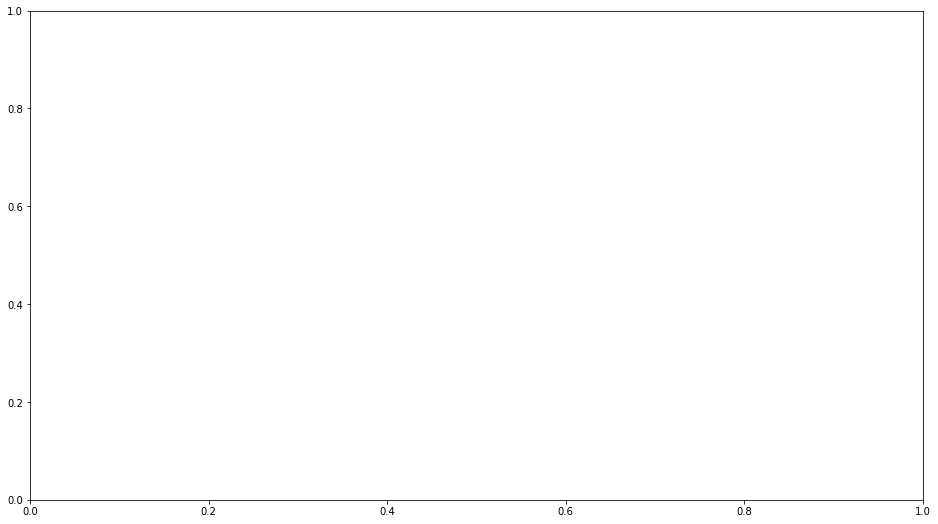

In [123]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot()